In [1]:
#Importar librería y archivo csv
import os 
import pandas as pd
df = pd.read_csv('input/attacks.csv',encoding='latin-1')

In [2]:
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
print(df.columns.values)

['Case Number' 'Date' 'Year' 'Type' 'Country' 'Area' 'Location' 'Activity'
 'Name' 'Sex ' 'Age' 'Injury' 'Fatal (Y/N)' 'Time' 'Species '
 'Investigator or Source' 'pdf' 'href formula' 'href' 'Case Number.1'
 'Case Number.2' 'original order' 'Unnamed: 22' 'Unnamed: 23']


In [4]:
# limpiar columnas repetidas o con valores nulos completos
df_clean=df.drop(['Case Number.1', 'Case Number.2','href formula', 'Unnamed: 22','Unnamed: 23'], axis=1)

In [5]:
print(df_clean.columns.values)

['Case Number' 'Date' 'Year' 'Type' 'Country' 'Area' 'Location' 'Activity'
 'Name' 'Sex ' 'Age' 'Injury' 'Fatal (Y/N)' 'Time' 'Species '
 'Investigator or Source' 'pdf' 'href' 'original order']


In [6]:
df_clean=df_clean.drop_duplicates()

In [7]:
df_clean["Species "]=df_clean["Species "].dropna()


# Hipótesis 1:
#### Los ataques fatales de los tiburones blancos suelen ser provocados por el ser humano

In [8]:
#Observar columna especie y dividir entre la especie de tiburon blanco. y otros
df_clean["Species "].dropna()

0                                             White shark
3                                               2 m shark
4                                         Tiger shark, 3m
6                                             Tiger shark
7                                         Lemon shark, 3'
                              ...                        
6276                                      12' tiger shark
6293                                         Blue pointer
6294                                         Blue pointer
6295                                        Blue pointers
6296    Said to involve a grey nurse shark that leapt ...
Name: Species , Length: 3464, dtype: object

In [9]:
import re
df_clean["Species "].str.contains('White|white', regex=True )

0         True
1          NaN
2          NaN
3        False
4        False
         ...  
6307       NaN
6308       NaN
6309       NaN
8702       NaN
25722      NaN
Name: Species , Length: 6312, dtype: object

In [10]:
import numpy as np
df_clean["Specie_white"]=np.where(df_clean["Species "].str.contains('White|white', regex=True ), "White Shark", "others")


In [11]:
#Dividir adecuadamente los provocados y no provocados

types= list(df_clean.Type.items())
for i in types:
    ind=[i[0]]
    res=re.findall(r'Un.*|un.*',str(i[1]))
    if res:
        df_clean["Type"][ind]="Unprovocked"
    else:
        df_clean["Type"][ind]="Provocked"

df_clean["Type"].value_counts()
        

/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Unprovocked    4595
Provocked      1717
Name: Type, dtype: int64

In [12]:
df_clean["Specie_white"].dropna().value_counts()

White Shark    3515
others         2797
Name: Specie_white, dtype: int64

In [13]:
#Quitar valores nulos

df_h1=df_clean[["Type","Fatal (Y/N)","Specie_white"]].dropna()
df_h1

,Type,Fatal (Y/N),Specie_white
0,Provocked,N,White Shark
1,Unprovocked,N,White Shark
2,Provocked,N,White Shark
3,Unprovocked,N,others
4,Provocked,N,others
...,...,...,...
6297,Unprovocked,Y,White Shark
6298,Unprovocked,Y,White Shark
6299,Unprovocked,Y,White Shark
6300,Unprovocked,Y,White Shark


In [14]:
#Crear DF que sólo contenga la especie de tiburon blanco, reiniciamos el index y lo renombramos como White_Shark

tiburon_blanco= df_h1[df_h1.Specie_white == "White Shark"][["Type","Fatal (Y/N)"]].rename_axis('White_Shark').reset_index()

tiburon_blanco

,White_Shark,Type,Fatal (Y/N)
0,0,Provocked,N
1,1,Unprovocked,N
2,2,Provocked,N
3,5,Unprovocked,N
4,9,Unprovocked,N
...,...,...,...
3471,6297,Unprovocked,Y
3472,6298,Unprovocked,Y
3473,6299,Unprovocked,Y
3474,6300,Unprovocked,Y


      index         Type  White_Shark
0        35  Unprovocked           91
1        65  Unprovocked          144
2        69  Unprovocked          149
3        73  Unprovocked          155
4        86  Unprovocked          174
...     ...          ...          ...
1106   3471  Unprovocked         6297
1107   3472  Unprovocked         6298
1108   3473  Unprovocked         6299
1109   3474  Unprovocked         6300
1110   3475  Unprovocked         6301

[1111 rows x 3 columns]


,White_Shark
Type,
Provocked,180
Unprovocked,931


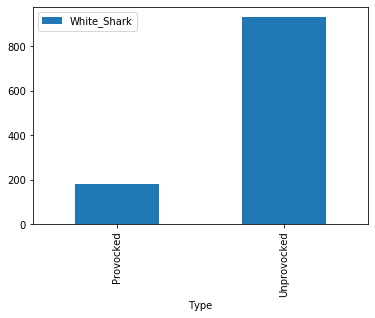

In [15]:
# Sobre la tabla anterior filtrar sólo los ataques fatales, y reindexar.
# Además agrupar por "Type" para conocer si son provocados y hacer gráfica con los datos obtenidos

%matplotlib inline
pruebita= tiburon_blanco[tiburon_blanco["Fatal (Y/N)"] == "Y"][["Type","White_Shark"]].reset_index()
print(pruebita)

provo= pruebita.groupby("Type").agg({"White_Shark":"count"})



display(provo)
provo.plot.bar()
